In [1]:
"""Run an simple experiment locally without using config file.

This file is presented as a very simple entry point to code.
For running any meaningful experiments, we suggest `batch_runner.py` or
`local_runner.py`.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

import numpy as np
import pandas as pd
import plotnine as gg
from plotnine import *

from base.experiment import BaseExperiment
from finite_arm.agent_finite import FiniteBernoulliBanditTS, DriftingFiniteBernoulliBanditTS, FiniteBernoulliBanditLangevin

from finite_arm.env_finite import DriftingFiniteArmedBernoulliBandit, FiniteArmedBernoulliBandit

import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.getcwd())

##############################################################################
# Running a single experiment

probs = [0.7, 0.8, 0.9, 0.2, 0.34, 0.77, 0]
n_arm = len(probs) 
n_steps = 150
seed = 0

agent = FiniteBernoulliBanditLangevin(n_arm)
env = FiniteArmedBernoulliBandit(probs)
experiment = BaseExperiment(
    agent,
    env,
    n_steps=n_steps,
    seed=seed,
    unique_id='example',
    evaluation_pause=25
)

experiment.run_experiment()

##############################################################################
# Simple display / plot of results

experiment.results.head()

series = ['prob{}'.format(i) for i in range(n_arm)]
df = experiment.results.melt(
    id_vars=['t'],
    value_vars=series,
    var_name='prob',
    value_name='count'
)

posterior_means = (ggplot(df) + aes('t', 'count', color='prob', group='prob') + geom_point() +
 geom_line())


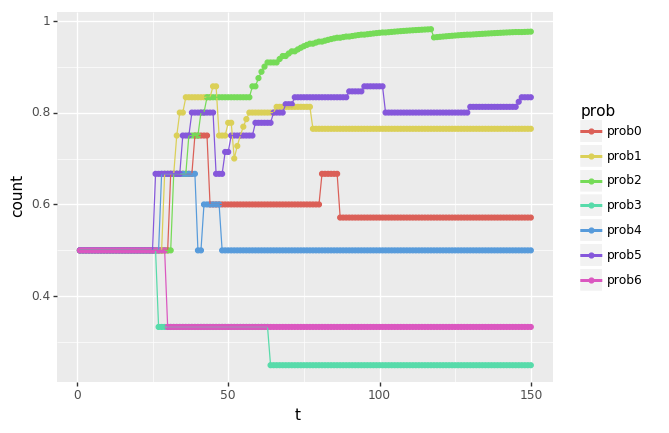

<ggplot: (8739658316836)>

In [2]:
display(posterior_means)
# probs = [0.7, 0.8, 0.9, 0.2, 0.34, 0.77, 0.01]

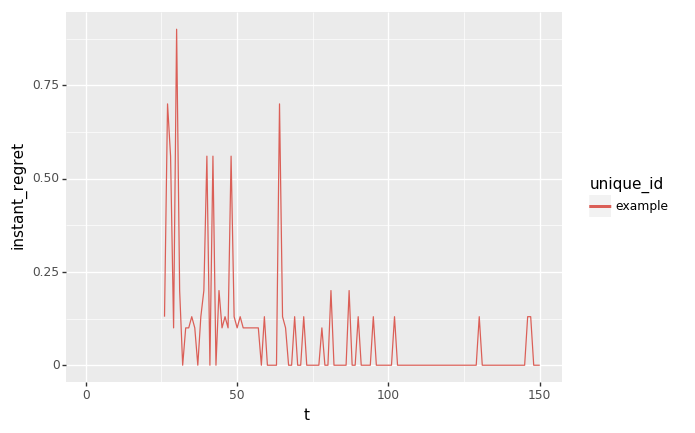

<ggplot: (8739658276030)>


In [3]:
p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='instant_regret', colour='unique_id')
     + gg.geom_line())
print(p)

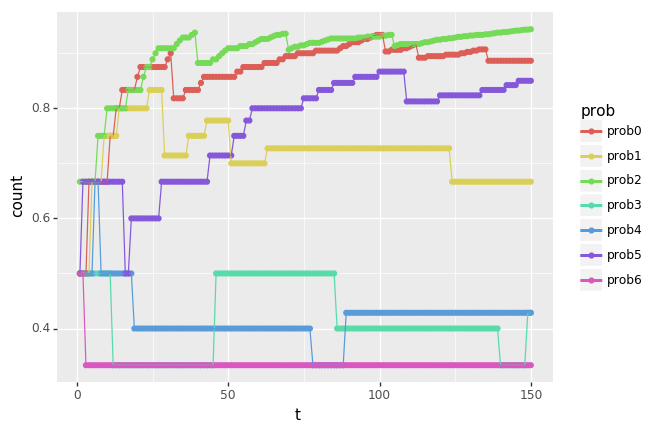

<ggplot: (-9223363297196501409)>

In [4]:
agent1 = FiniteBernoulliBanditLangevin(n_arm)
env1 = DriftingFiniteArmedBernoulliBandit(n_arm, probs=probs)
experiment1 = BaseExperiment(
    agent1,
    env1,
    n_steps=n_steps,
    seed=0,
    unique_id='example'
)

experiment1.run_experiment()

##############################################################################
# Simple display / plot of results

experiment1.results.head()

series = ['prob{}'.format(i) for i in range(n_arm)]
df1 = experiment1.results.melt(
    id_vars=['t'],
    value_vars=series,
    var_name='prob',
    value_name='count'
)
#display(df1)
pmeans = (ggplot(df1) + aes('t', 'count', color='prob', group='prob') + geom_point() +
 geom_line()) 

pmeans

In [5]:
t = [i for i in range(1, n_steps + 1)]
pd.DataFrame(data=np.array([series, probs]).T, columns=['prob', 'count'])

,prob,count
0,prob0,0.7
1,prob1,0.8
2,prob2,0.9
3,prob3,0.2
4,prob4,0.34
5,prob5,0.77
6,prob6,0


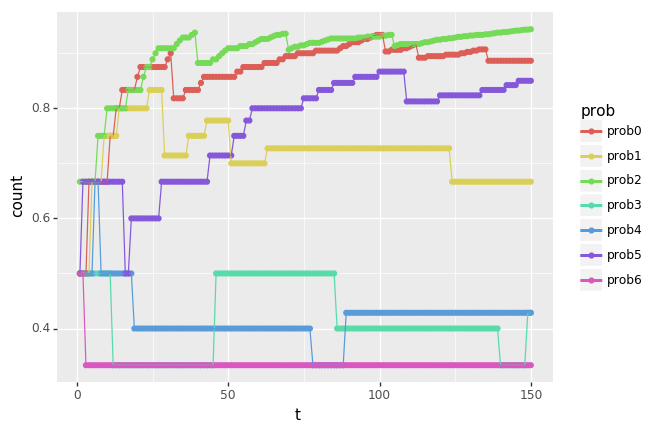

<ggplot: (-9223363297196501409)>

In [6]:
pmeans

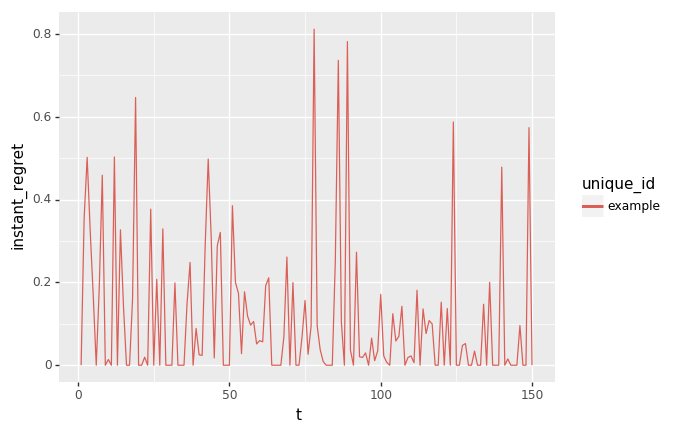

<ggplot: (-9223363297198741767)>


In [7]:
p = (gg.ggplot(experiment1.results)
     + gg.aes(x='t', y='instant_regret', colour='unique_id')
     + gg.geom_line())
print(p)